In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
img = cv2.imread('./test_img/shiv10.jpg')
img.shape

(590, 548, 3)

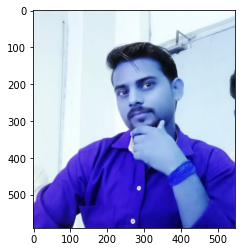

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(590, 548)

In [5]:
gray

array([[235, 235, 235, ..., 250, 250, 250],
       [235, 235, 235, ..., 250, 250, 250],
       [235, 235, 235, ..., 250, 250, 250],
       ...,
       [ 93,  94,  95, ...,  48,  44,  43],
       [ 93,  94,  95, ...,  50,  42,  40],
       [ 94,  95,  96, ...,  52,  43,  41]], dtype=uint8)

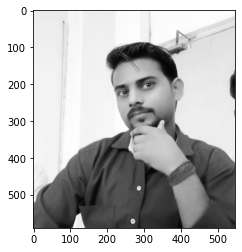

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier("./xml_file/frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./xml_file/haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[180, 130, 201, 201]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(180, 130, 201, 201)

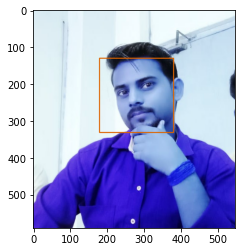

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(220,100,0),2)
plt.imshow(face_img)

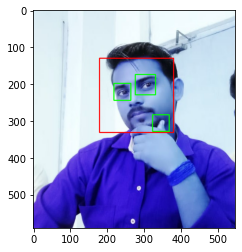

In [10]:
#cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

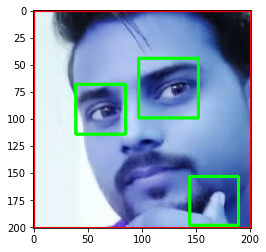

In [11]:
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(201, 201, 3)

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

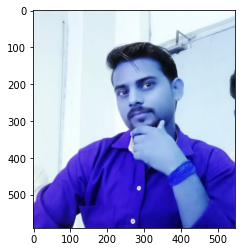

In [14]:
org_img = cv2.imread('.\datasets\shivam/shiv27.jpg')
plt.imshow(org_img)

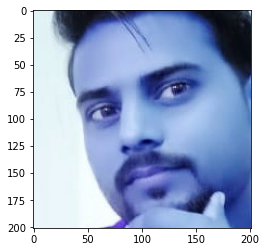

In [15]:
cropped_image = get_cropped_image_if_2_eyes('.\datasets\shivam/shiv27.jpg')
plt.imshow(cropped_image)

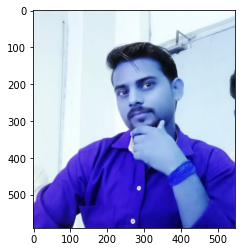

In [16]:
obs_img = cv2.imread('./test_img/shiv10.jpg')
plt.imshow(obs_img)

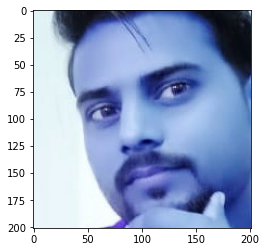

In [17]:
cropp = get_cropped_image_if_2_eyes('./test_img/shiv10.jpg')
plt.imshow(cropp)

In [18]:
#Creating new folders

path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./datasets/cropped', './datasets/shivam', './datasets/srk']

In [21]:
import shutil    #shell utilities (copy, mkdir, scanning, manipulation of files etc)
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1   #_
    celebrity_name = img_dir.split('/')[-1]   #split img_dir from / and save the -1/last part as name (print to verify)
    celebrity_file_names_dict[celebrity_name] = []   #_
    
    for entry in os.scandir(img_dir):                              #iterate through all images
        roi_color = get_cropped_image_if_2_eyes(entry.path)           #(extract face from all images->save in roi_color)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name   #separate folder for each person in cropped folder
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

Generating cropped images in folder:  ./datasets/cropped/shivam
Generating cropped images in folder:  ./datasets/cropped/srk


In [23]:
celebrity_file_names_dict

{'cropped': [],
 'shivam': ['./datasets/cropped/shivam/shivam1.png',
  './datasets/cropped/shivam/shivam2.png',
  './datasets/cropped/shivam/shivam3.png',
  './datasets/cropped/shivam/shivam4.png',
  './datasets/cropped/shivam/shivam5.png',
  './datasets/cropped/shivam/shivam6.png',
  './datasets/cropped/shivam/shivam7.png',
  './datasets/cropped/shivam/shivam8.png',
  './datasets/cropped/shivam/shivam9.png',
  './datasets/cropped/shivam/shivam10.png',
  './datasets/cropped/shivam/shivam11.png',
  './datasets/cropped/shivam/shivam12.png',
  './datasets/cropped/shivam/shivam13.png',
  './datasets/cropped/shivam/shivam14.png',
  './datasets/cropped/shivam/shivam15.png',
  './datasets/cropped/shivam/shivam16.png',
  './datasets/cropped/shivam/shivam17.png',
  './datasets/cropped/shivam/shivam18.png',
  './datasets/cropped/shivam/shivam19.png',
  './datasets/cropped/shivam/shivam20.png',
  './datasets/cropped/shivam/shivam21.png',
  './datasets/cropped/shivam/shivam22.png',
  './datasets/c

In [24]:
import pywt  

def w2d(img, mode, level):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

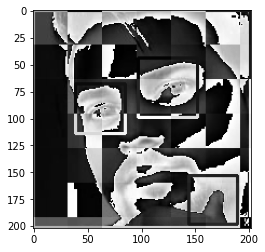

In [25]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray') 

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0, 'shivam': 1, 'srk': 2}

In [27]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [28]:
len(X)

52

In [29]:
len(X[0])

4096

In [30]:
X[0]


array([[228],
       [243],
       [245],
       ...,
       [250],
       [ 11],
       [  1]], dtype=uint8)

In [31]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(52, 4096)

In [32]:
X[0]

array([228., 243., 245., ..., 250.,  11.,   1.])

In [33]:
###TRAINING through SVM###

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
clf = SVC(kernel='rbf') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [39]:
svm_obj = SVC()
fr_model = svm_obj.fit(X_train, y_train)


In [40]:
y_pred = fr_model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6, 1],
       [2, 4]], dtype=int64)

In [42]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(clf.predict, 'saved_model.pkl')

['saved_model.pkl']